In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [139]:
from fastai.basics import *
import pandas as pd

## Data loader

In [140]:
p = Path('../data/Raman Ana/')
p.ls()[:5]

[PosixPath('../data/Raman Ana/GO_HNO3_5G_inttime20_lasepower33.8.lib'),
 PosixPath('../data/Raman Ana/coal_oxidizer_30inttime.lib'),
 PosixPath('../data/Raman Ana/coalchar_hummer_30inttime.lib'),
 PosixPath('../data/Raman Ana/GO_HNO3_5Gstar_20inttime_2.lib'),
 PosixPath('../data/Raman Ana/GO_HNO3_5Gstar_20inttime.spc')]

In [141]:
parent=[x.parents[0] for x in p.rglob("*.[tT][xX][tT]")]
child=[x.name for x in p.rglob("*.[tT][xX][tT]")]

In [142]:
parent[15:20]

[PosixPath('../data/Raman Ana'),
 PosixPath('../data/Raman Ana'),
 PosixPath('../data/Raman Ana/1_16_19'),
 PosixPath('../data/Raman Ana/1_16_19'),
 PosixPath('../data/Raman Ana/1_16_19')]

In [143]:
child[15:20]

['Go_oxidizer_20inttime.txt',
 'GO_3STEPS_1HR_GO_09_24_inttime5_lasepower33.8.txt',
 'coal EL oxidizer method 2.txt',
 'coal el char oxidizer 2 better.txt',
 'coal hummers5.txt']

In [144]:
fnames = []
for n in p.rglob('*.txt'): fnames.append(n.name)
fnames[:5]

['GO_HNO3_33.8LASER_5INTTIME_09_24.txt',
 'coalchar_oxidizer_30inttime.txt',
 'Go_hummer_20inttime.txt',
 'GO_HNO3_5Gstar_20inttime.txt',
 'GO_HNO3_5Gstar_5inttime_laser33.8.txt']

In [145]:
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""  # fastai work-around LazyConfigValue problem
df_ = pd.read_csv(parent[61]/child[61],names=['Energy',fnames[0]],header=None, delimiter = '\t')
df_.head()

,Energy,GO_HNO3_33.8LASER_5INTTIME_09_24.txt
0,200.0,1417.026
1,201.0,1446.209
2,202.0,1475.391
3,203.0,1504.574
4,204.0,1539.777


In [146]:
def load_data(parent, child):
    dfs=[]
    for p,c in zip(parent,child):
        dfs.append(pd.read_csv(p/c, names=['Energy',
                   c], header=None, delimiter = '\t'))
    return pd.concat(dfs,axis=1).T.drop_duplicates().T  # care: works only when all E column values are the same

In [147]:
df=load_data(parent,child)
df.head()

,Energy,GO_HNO3_33.8LASER_5INTTIME_09_24.txt,coalchar_oxidizer_30inttime.txt,Go_hummer_20inttime.txt,GO_HNO3_5Gstar_20inttime.txt,GO_HNO3_5Gstar_5inttime_laser33.8.txt,Go_oxidizer_30inttime.txt,coalchar_hummer_30inttime.txt,coal_oxidizer_30inttime.txt,GO_HNO3_5G_inttime20_lasepower33.8.txt,...,CoalEL_HNO3_33.8laser_30inttime.txt,CoalChar_Hummers_33.8laser_20inttime.txt,CoalChar_HNO3_33.8laser_20inttime.txt,Biohar_Hummers_33.8laser_30inttime.txt,Coal_HNO3_33.8LASER_20INTTIME.txt,Biohar_HNO3_33.8laser_20inttime.txt,CoalChar_Hummers_33.8laser_30inttime.txt,CoalEL_HNO3_33.8laser_20inttime.txt,Biohar_HNO3_33.8laser_30inttime_2.txt,CoalEL_Hummers.33.8laser_30inttime.txt
0,200.0,429.056,1881.845,1174.111,1478.076,563.483,2144.423,2110.007,2396.635,1938.885,...,4654.685,1363.0,1821.508,1928.946,2170.840,1236.116,1890.760,2644.760,1891.861,3032.831
1,201.0,437.949,1922.145,1191.899,1510.316,570.709,2192.228,2171.151,2468.341,1970.569,...,4729.449,1390.0,1857.917,1975.360,2205.304,1259.740,1942.455,2696.455,1949.670,3110.930
2,202.0,446.843,1962.445,1209.686,1542.556,577.935,2240.032,2232.296,2540.047,2002.254,...,4804.212,1417.0,1894.326,2021.775,2239.767,1283.364,1994.151,2748.151,2007.480,3189.028
3,203.0,455.737,2002.745,1227.474,1574.796,585.161,2287.836,2293.441,2611.754,2033.938,...,4878.976,1444.0,1930.735,2068.189,2274.230,1306.989,2045.846,2799.846,2065.290,3267.127
4,204.0,459.866,2050.313,1252.522,1609.119,596.536,2327.570,2344.033,2655.705,2064.388,...,4993.563,1474.0,1963.424,2110.058,2321.557,1336.632,2103.568,2844.509,2111.301,3344.421


## Data plots

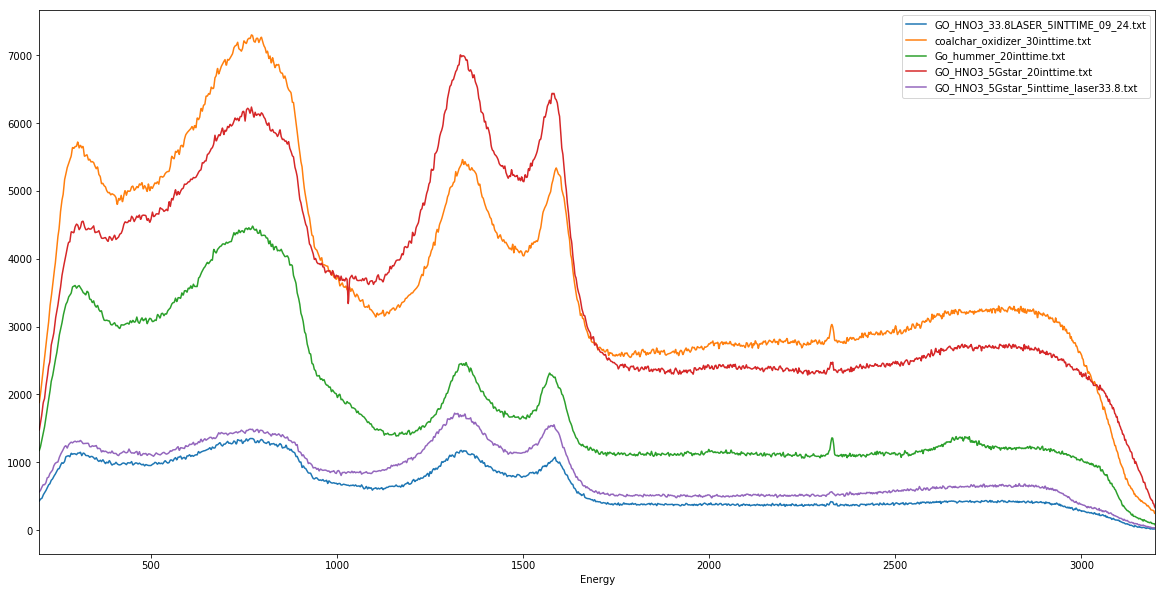

In [148]:
df.plot(x='Energy',y=child[:5],figsize=(20,10))

Text(0, 0.5, 'Intensity a.u.')

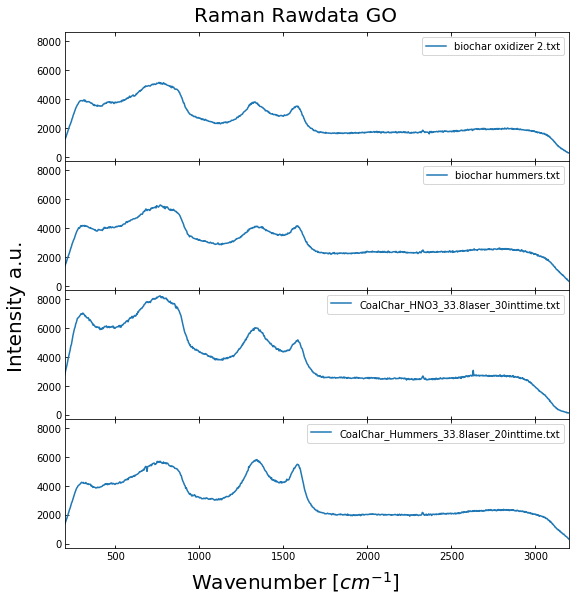

In [149]:
fig, axes = plt.subplots(nrows=4, ncols=1, 
                         sharex=True, sharey=True, figsize=(8,8))
df.plot(x='Energy', y='biochar oxidizer 2.txt', ax=axes[0])
df.plot(x='Energy', y='biochar hummers.txt', ax=axes[1])
df.plot(x='Energy', y='CoalChar_HNO3_33.8laser_30inttime.txt', ax=axes[2])
df.plot(x='Energy', y='CoalChar_Hummers_33.8laser_20inttime.txt', ax=axes[3])
fig.tight_layout()

# Bring subplots close to each other and positioned further to the right
fig.subplots_adjust(hspace=0, left=0.1, bottom=0.08)

# Hide x labels and tick labels for all but bottom plot.
for ax in axes:
    ax.xaxis.label.set_visible(False)
    ax.tick_params(axis='both', which='both', direction='in',top=True)
                    #     ax.label_outer()

fig.suptitle('Raman Rawdata GO', y=1.02, fontsize=20)
fig.text(0.5, 0.01, r'Wavenumber [$cm^{-1}$]', fontsize=20, ha='center')
fig.text(0, 0.5, 'Intensity a.u.', fontsize=20, va='center', rotation='vertical')

## Baseline subtraction

In [212]:
import rampy as rp
import peakutils

In [226]:
def normalise(x, y):
    bir = np.array([(1000,1100),(1750,1800)]) # The regions where the baseline will be fitted

    y_corr, y_base = rp.baseline(x, y, bir,'poly',polynomial_order=2)
    
    # signal selection
    lb = 1100  # The lower boundary of interest
    hb = 1800  # The upper boundary

    x_fit = x[np.where((x > lb)&(x < hb))]
    y_fit = y_corr[np.where((x > lb)&(x < hb))]
    
    #SVN normalisation
    y_hat = y_fit.mean()
    std = sqrt(np.sum((y_fit-y_hat)**2)/(len(y_fit)-1))
    y_sn = (y_fit-y_hat)/std
    
    #min-max normalisation
    y_sn_hat = y_sn.mean()
    y_mm = (y_sn-y_sn.min())/(y_sn.max()-y_sn.min())
    
    return y_mm

In [263]:
x = df['Energy'].values

In [341]:
results=[normalise(x, val.values) for cols,val in df.iteritems()]
# for cols, val in df.iteritems():
#     results.append(normalise(x, val.values))